In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# --- Reproducibility ---
np.random.seed(101)
tf.random.set_seed(101)

2025-08-31 15:03:22.864500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def generate_samples(n_samples: int = 50000) -> tuple:
    x = np.linspace(0, 50, n_samples).astype(np.float32)
    y = np.linspace(0, 50, n_samples).astype(np.float32)
    x += np.random.uniform(-4, 4, n_samples).astype(np.float32)
    y += np.random.uniform(-4, 4, n_samples).astype(np.float32)
    return x, y

def plot_raw_data(x, y):
    plt.scatter(x, y)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter plot of X and Y')
    plt.show()

def plot_fitted_line(x, y, W, b):
    plt.scatter(x, y, label="Original data")
    x_line = np.linspace(x.min(), x.max(), 200).astype(np.float32).reshape(-1, 1)
    y_line = (x_line @ W.numpy()) + b.numpy()
    plt.plot(x_line, y_line, 'r', label="Fitted line")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Linear Regression Fit (TF2 stable)")
    plt.legend()
    plt.show()

In [3]:
def train_linear_regression_model(x,y):
    # --- Convert to tensors ---
    X = tf.convert_to_tensor(x.reshape(-1, 1), dtype=tf.float32)
    Y = tf.convert_to_tensor(y.reshape(-1, 1), dtype=tf.float32)

    # --- Parameters (small init near 0) ---
    W = tf.Variable(tf.zeros([1, 1], dtype=tf.float32))
    b = tf.Variable(tf.zeros([1], dtype=tf.float32))

    # --- Hyperparams ---
    learning_rate = 0.01
    epochs = 1000
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm=1.0)

    # --- Model ---
    def predict(x_tensor):
        return tf.matmul(x_tensor, W) + b

    # --- Loss (MSE) ---
    def loss_fn(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    # --- Training loop ---
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = predict(X)
            loss = loss_fn(Y, y_pred)

        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}: cost={loss.numpy():.6f}, W={W.numpy().ravel()[0]:.6f}, b={b.numpy().ravel()[0]:.6f}")

    print("\nTraining complete")
    print(f"Final cost={loss.numpy():.6f}, W={W.numpy().ravel()[0]:.6f}, b={b.numpy().ravel()[0]:.6f}")
    return W, b

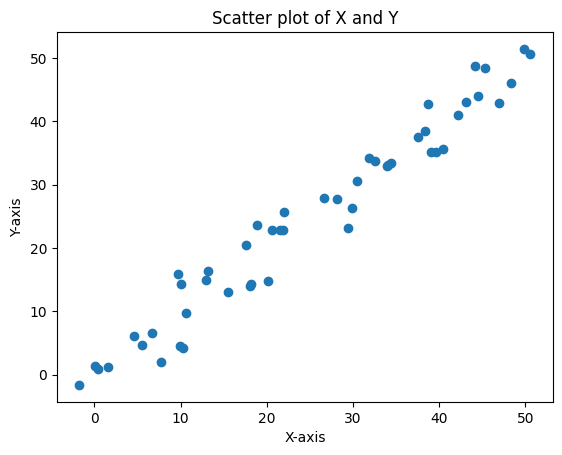

Epoch 100: cost=9.954460, W=0.959999, b=0.931424
Epoch 200: cost=9.832192, W=0.967999, b=0.681433
Epoch 300: cost=9.791723, W=0.971565, b=0.546719
Epoch 400: cost=9.776214, W=0.973342, b=0.475163
Epoch 500: cost=9.764462, W=0.974604, b=0.434818
Epoch 600: cost=9.760098, W=0.975180, b=0.413441
Epoch 700: cost=9.756985, W=0.975547, b=0.401681
Epoch 800: cost=9.755899, W=0.975718, b=0.394853
Epoch 900: cost=9.755061, W=0.975826, b=0.391174
Epoch 1000: cost=9.754660, W=0.975882, b=0.389181

Training complete
Final cost=9.754660, W=0.975882, b=0.389181


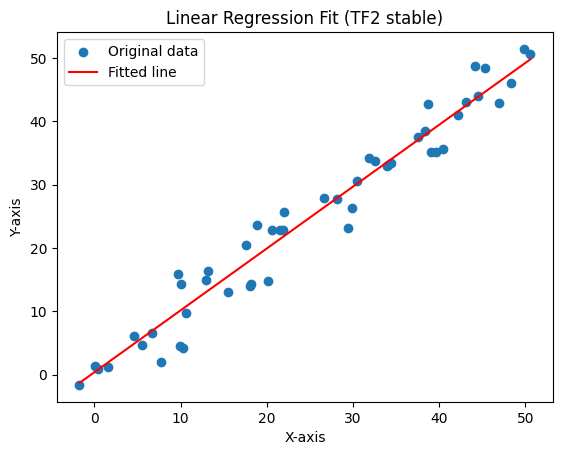

In [4]:

# --- Generate noisy data ---
x, y = generate_samples(50)

# --- Plot raw data ---
plot_raw_data(x, y)

W, b = train_linear_regression_model(x, y)

# --- Plot fitted line ---
plot_fitted_line(x, y, W, b)


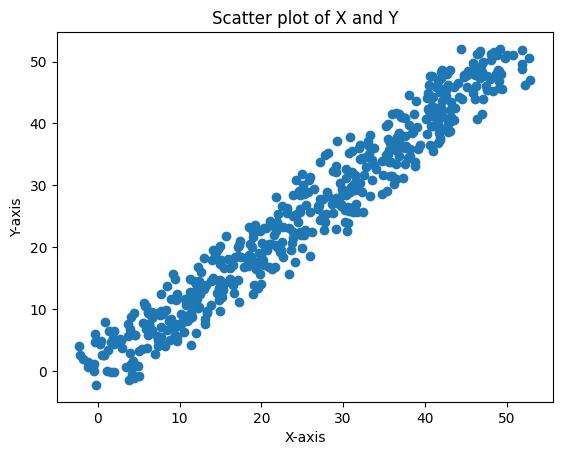

Epoch 100: cost=11.456608, W=0.979999, b=0.949617
Epoch 200: cost=11.455971, W=0.979999, b=0.757554
Epoch 300: cost=11.461655, W=0.979999, b=0.732083
Epoch 400: cost=11.462510, W=0.979999, b=0.728705
Epoch 500: cost=11.462625, W=0.979999, b=0.728257
Epoch 600: cost=11.462642, W=0.979999, b=0.728198
Epoch 700: cost=11.462644, W=0.979999, b=0.728190
Epoch 800: cost=11.462643, W=0.979999, b=0.728189
Epoch 900: cost=11.462643, W=0.979999, b=0.728189
Epoch 1000: cost=11.462643, W=0.979999, b=0.728189

Training complete
Final cost=11.462643, W=0.979999, b=0.728189


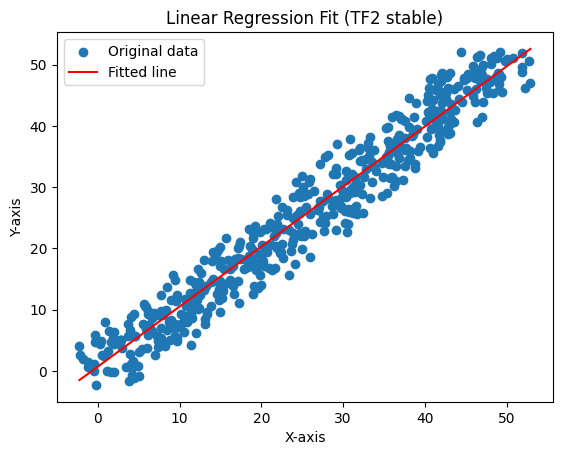

In [5]:
# --- Generate noisy data ---
x, y = generate_samples(500)

# --- Plot raw data ---
plot_raw_data(x, y)

W, b = train_linear_regression_model(x, y)

# --- Plot fitted line ---
plot_fitted_line(x, y, W, b)


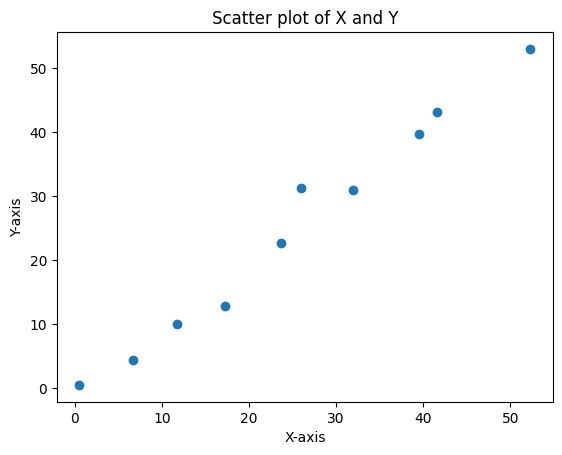

Epoch 100: cost=7.170178, W=0.979999, b=0.912431
Epoch 200: cost=5.954911, W=0.999764, b=-0.009009
Epoch 300: cost=5.420923, W=1.019200, b=-0.651575
Epoch 400: cost=5.228773, W=1.028214, b=-1.002014
Epoch 500: cost=5.154921, W=1.034452, b=-1.186658
Epoch 600: cost=5.122648, W=1.036468, b=-1.289571
Epoch 700: cost=5.108605, W=1.037975, b=-1.341146
Epoch 800: cost=5.101789, W=1.038554, b=-1.367393
Epoch 900: cost=5.098386, W=1.038984, b=-1.381706
Epoch 1000: cost=5.096680, W=1.039204, b=-1.389068

Training complete
Final cost=5.096680, W=1.039204, b=-1.389068


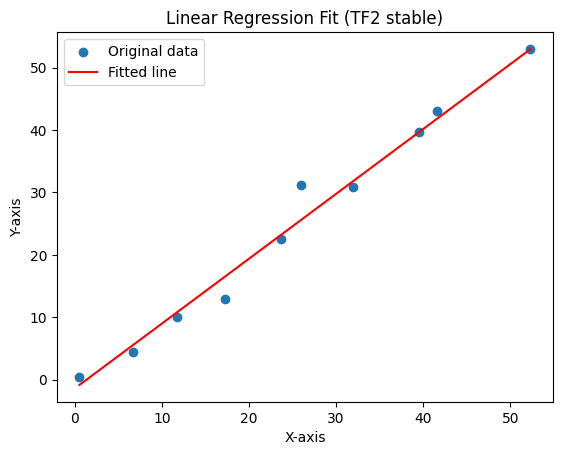

In [6]:
# --- Generate noisy data ---
x, y = generate_samples(10)

# --- Plot raw data ---
plot_raw_data(x, y)

W, b = train_linear_regression_model(x, y)

# --- Plot fitted line ---
plot_fitted_line(x, y, W, b)
